# PSC INNOVATIVE
# RAJ PARMAR : 21BCE240
# FENIL RAMOLIYA : 21BCE244

# MOVIE RECOMENDATION SYSTEM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
from IPython.display import display_html
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# FLOW:
    1) DATASET DESCRIPTION
    2) GRAPH AND PANDAS
    3) RECOMMENDATION SYSTEM

>> PART 1

In [2]:
df = pd.read_csv('psc_innovative.csv')

In [48]:
df.head(10)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genre_1,genre_2,genre_3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,2.888450e+07,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,2.503418e+08,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1.006234e+09,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,4.796192e+07,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,9.550000e+02,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None
5,6,Schindler's List,1993,9.0,"Biography,Drama,History",R,3h 15m,"Whoever saves one life, saves the world entire.",22000000,3.221612e+08,"Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",Steven Spielberg,"Thomas Keneally,Steven Zaillian",Biography,Drama,History
6,7,The Lord of the Rings: The Return of the King,2003,9.0,"Action,Adventure,Drama",PG-13,3h 21m,The eye of the enemy is moving.,94000000,1.146458e+09,"Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens",Action,Adventure,Drama
7,8,Pulp Fiction,1994,8.9,"Crime,Drama",R,2h 34m,Girls like me don't make invitations like this...,8000000,2.139288e+08,"John Travolta,Uma Thurman,Samuel L. Jackson,Br...",Quentin Tarantino,"Quentin Tarantino,Roger Avary",Crime,Drama,None
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,"Action,Adventure,Drama",PG-13,2h 58m,The Legend Comes to Life,93000000,8.982044e+08,"Elijah Wood,Ian McKellen,Orlando Bloom,Sean Be...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens",Action,Adventure,Drama
9,10,"The Good, the Bad and the Ugly",1966,8.8,"Adventure,Western",Approved,2h 58m,They formed an alliance of hate to steal a for...,1200000,2.525389e+07,"Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo ...",Sergio Leone,"Luciano Vincenzoni,Sergio Leone,Agenore Incrocci",Adventure,Western,None


In [4]:
df.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [6]:
df.shape

(250, 13)

In [7]:
df.count()

rank           250
name           250
year           250
rating         250
genre          250
certificate    250
run_time       250
tagline        250
budget         250
box_office     250
casts          250
directors      250
writers        250
dtype: int64

1) rank: The movie's standing according to its level of popularity or any other factor.

2) name: The film's title.

3) year: The year the movie was first shown.

4) rating: The film's score out of ten on IMDb's scale of one to ten.

5) genre: the classification or style of a film, such as drama, comedy, action, etc.

6) Certificate: The rating assigned to the film by the proper certifying body, indicating its suitability for different age groups and perhaps containing details about the content.

7) run_time: How long the film is.

8) Tagline: The statement or clause used to advertise a film.

9) budget: The movie's projected production costs.

10) box_office: The sum of money the movie made at the box office.

11) cast: a cast is a list of the actors who appear in a film.

12) directors: The person who oversaw the film's production.

13) writers: The authors of the movie's script.


## SPLITTING THE GENRE COLUMN INTO DIFFERENT COLUMNS

In [8]:
genre_data = df['genre'].str.split(',', expand=True)
cols=len(genre_data.columns)
genre_data.columns = [f'genre_{i}' for i in range(1,cols+1)]
df = pd.concat([df,genre_data],axis=1)

In [9]:
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genre_1,genre_2,genre_3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None


## average rating sorted by genre

In [10]:
top_rate =  df.groupby('genre').mean().sort_values('rating',ascending=False)
top_rate =  top_rate[['rating']].round(2)
top_rate.reset_index(inplace=True)
top_rate.head(20)

,genre,rating
0,"Adventure,Western",8.80
1,"Action,Adventure,Drama",8.70
2,"Adventure,Drama,Sci-Fi",8.60
3,"Drama,Family,Fantasy",8.60
4,"Crime,Drama,Fantasy",8.60
5,"Action,Drama,Mystery",8.50
6,"Animation,Adventure,Drama",8.50
7,"Drama,Music",8.50
8,"Drama,Mystery,Sci-Fi",8.50
9,"Drama,Mystery,War",8.50


>> PART 2

## graph for box office collection vs certificate

In [12]:
fig = px.scatter(df,x='certificate', y='box_office')
fig.show()

## count of certificate

In [13]:
df['box_office'] = df['box_office'].replace("Not Available",0)
cert_cnt =  df['certificate'].value_counts()
cert_cnt

R                97
PG               37
PG-13            35
Not Rated        24
G                19
Passed           16
Approved         14
18+               1
Not Available     1
TV-PG             1
Unrated           1
X                 1
13+               1
TV-MA             1
GP                1
Name: certificate, dtype: int64

## graph for box office collection vs genre

In [14]:
fig = px.violin(df, x='genre', y='box_office', color='genre', title='Box Office by Genre')
fig.show()

## Top 10 movies by rating

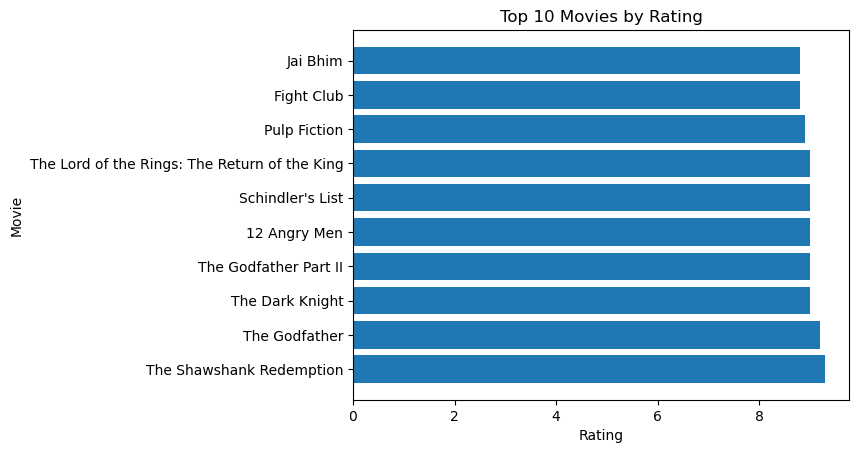

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genre_1,genre_2,genre_3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None
5,6,Schindler's List,1993,9.0,"Biography,Drama,History",R,3h 15m,"Whoever saves one life, saves the world entire.",22000000,322161245,"Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",Steven Spielberg,"Thomas Keneally,Steven Zaillian",Biography,Drama,History
6,7,The Lord of the Rings: The Return of the King,2003,9.0,"Action,Adventure,Drama",PG-13,3h 21m,The eye of the enemy is moving.,94000000,1146457748,"Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens",Action,Adventure,Drama
7,8,Pulp Fiction,1994,8.9,"Crime,Drama",R,2h 34m,Girls like me don't make invitations like this...,8000000,213928762,"John Travolta,Uma Thurman,Samuel L. Jackson,Br...",Quentin Tarantino,"Quentin Tarantino,Roger Avary",Crime,Drama,None
11,12,Fight Club,1999,8.8,Drama,R,2h 19m,How much can you know about yourself if you've...,63000000,101209702,"Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier...",David Fincher,"Chuck Palahniuk,Jim Uhls",Drama,None,None
233,234,Jai Bhim,2021,8.8,"Crime,Drama,Mystery",TV-MA,2h 44m,imeDramaMystery,Not Available,0,"Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vij...",T.J. Gnanavel,"T.J. Gnanavel,Rajendra Sapre",Crime,Drama,Mystery


In [15]:
top_10 = df.sort_values(by='rating',ascending=False)
top10=top_10.head(10)
plt.barh(top10['name'],top10['rating'])
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Movies by Rating')
plt.show()
top10

## Top 10 movie writers

In [16]:
top_movies_w = df.nlargest(10, 'rating')
fig = go.Figure(data=[go.Bar(x=top_movies_w['writers'], y=top_movies_w['rating'], marker={'color': 'darkmagenta'})])
fig.update_layout(title='Top 10 Movies by Writers')
fig.show()

## Top 10 movie director

In [17]:
top_movies_d = df.nlargest(10, 'rating')
fig = go.Figure(data=[go.Bar(x=top_movies_d['directors'], y=top_movies_d['rating'], marker={'color': 'darkslateblue'})])
fig.update_layout(title='Top 10 Movies by Directors')
fig.show()

## histogram for rating

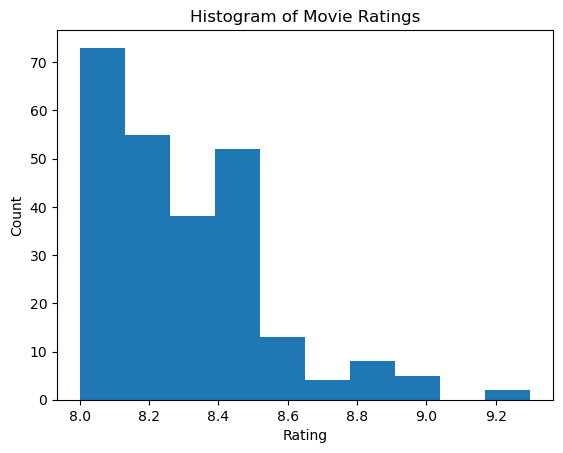

In [18]:
# create a histogram of the "rating" column
plt.hist(df['rating'], bins=10)

# set the title and labels
plt.title("Histogram of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

# display the plot
plt.show()

## using sunburst for [genre,year,rating]

In [19]:
grouped_df = df.groupby(['genre', 'year', 'rating']).size().reset_index(name='count')
fig = px.sunburst(grouped_df, path=['genre', 'year', 'rating'], values='count')
fig.update_layout(title='Movie Ratings by Genre and Year', height = 1200, width = 1200)
fig.show()

## writer with most movies on the dataset

In [20]:
df_writers =  df['writers'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).rename('writer')
df_top_writers = df_writers.value_counts().nlargest(10) 
fig = px.pie(df_top_writers, values='writer', names=df_top_writers.index, title='Top 10 Writers')
fig.show()

## director with most movies on the dataset

In [21]:
df_directors =  df['directors'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).rename('directors')
df_top_directors = df_directors.value_counts().nlargest(10)
df_top_directors
fig = px.pie(df_top_directors, values='directors', names=df_top_directors.index, title='Top 10 Directors')
fig.show()

# Genre wise rating, which has highest

The genre with the highest average rating is Crime


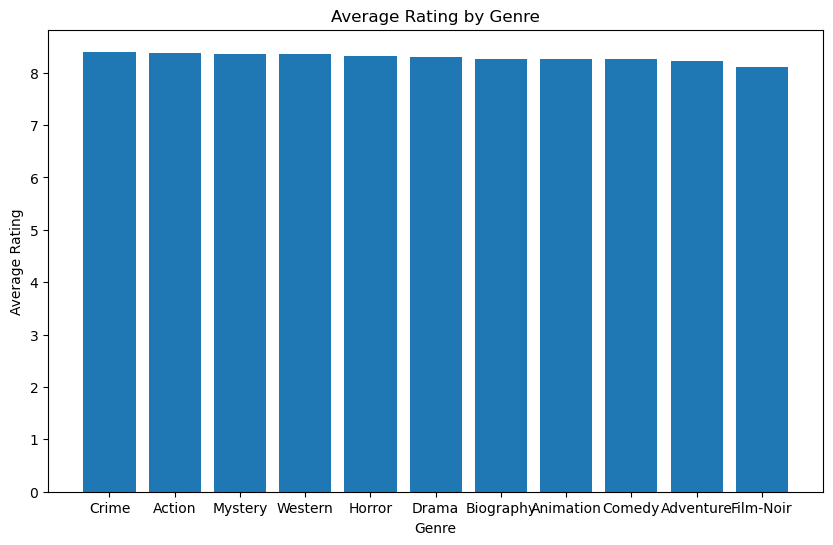

,genre_1,rating
5,Crime,8.400000
0,Action,8.366667
9,Mystery,8.350000
10,Western,8.350000
8,Horror,8.325000
6,Drama,8.295588
3,Biography,8.265217
2,Animation,8.256522
4,Comedy,8.252174
1,Adventure,8.222727


In [22]:
# Group the dataset by genre and calculate the mean rating for each group
df_genre_rating = df.groupby('genre_1')['rating'].mean().reset_index()

# Sort the data by rating in descending order
df_genre_rating = df_genre_rating.sort_values('rating', ascending=False)

print('The genre with the highest average rating is', df_genre_rating.iloc[0]['genre_1'])

plt.figure(figsize=(10, 6))
plt.bar(df_genre_rating['genre_1'], df_genre_rating['rating'])
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.show()
df_genre_rating

# rating w.r.t year

In [23]:
grouped_df = df.groupby('year')['rating'].mean().reset_index()

# Create a line plot of the mean rating over time using Plotly
fig = px.line(grouped_df, x='year', y='rating', title='Average Rating over Time', color_discrete_sequence=['blue'])

# Customize the plot
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating')

# Show the plot
fig.show()


# BOX OFFICE COLLECTION VS RATING USING pyplot EXPRESS

In [24]:
df['box_office'] =  pd.to_numeric(df['box_office'],errors='coerce')
df=df.dropna(subset=['box_office'])
fig = px.scatter(df, x='rating', y='box_office', color='genre', size='box_office', hover_name='name', title='Movie Ratings vs. Box Office Revenue')
fig.show()

# GRAPH FOR DIRECTORS (user input)

In [49]:
director = input("Enter the director name: ")
dir_movie = df[df['directors']==director]
fig = px.bar(dir_movie, x='name', y='rating', color='rating',
             color_continuous_scale='Inferno', title=f'Top {director} Movies on IMDB')
fig.show()

Enter the director name: Christopher Nolan


# GRAPH FOR WRITERS (user input)

In [27]:
writer = input("Enter the writer name: ")
# Split the writers column and create a new dataframe
df_writers = df['writers'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('writer')
df_new = df.drop('writers', axis=1).join(df_writers)

# # Filter the dataframe based on the writer name
writer_movies = df_new[df_new['writer'].str.contains(writer, case=False)]

# # Group the movies by name and calculate the average rating
avg_ratings = writer_movies.groupby('name')['rating'].mean().reset_index()

# # Sort the movies by rating in descending order and take top 10
top_movies = avg_ratings.sort_values('rating', ascending=False).head(10)

# Plot the bar graph using Plotly Express
fig = px.bar(top_movies, x='name', y='rating', color='rating', 
             color_continuous_scale='Inferno', title=f'Top Movies for {writer}')
fig.show()

Enter the writer name: Jonathan Nolan


# SEARCH THE MOVIE BY YOUR FAVOURITE CAST NAME

In [29]:
cast = input("Enter the cast name: ")
cast_movie = df[df['casts'].str.contains(cast)]
cast_movie

Enter the cast name: 


,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genre_1,genre_2,genre_3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,2.888450e+07,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,2.503418e+08,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1.006234e+09,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,4.796192e+07,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,9.550000e+02,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,2.166391e+08,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett",Drama,None,None
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,1.448000e+04,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev",Adventure,Biography,Drama
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,0.000000e+00,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott",Animation,Adventure,Comedy
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,5.276789e+07,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley,Biography,Drama,History


>> PART 3

# CONTENT BASED FILTERING

-- when model looks at the content of the shows and movies you've watched and recommends similar content based on what you seem to like.

### Term Frequency-Inverse Document Frequency

It is a numerical statistic that quantifies the significance of a word in a corpus or collection of documents.Used in information retrieval, text mining, and user modelling searches, it is frequently employed as a weighting factor. To account for the fact that certain words are used more frequently than others overall, the tf-idf value rises according to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the term. One of the most well-liked term-weighting methods is tf-idf.

The first part, "term frequency," simply measures how often a word appears in a document. So if a document mentions the word "ok" 5 times, its term frequency for "ok" is 5.

The second part, "inverse document frequency," measures how rare a word is across all documents in the corpus. It's calculated by dividing the total number of documents in the corpus by the number of documents that contain the word, and then taking the logarithm of that ratio. This means that words that appear in many documents (like "the" or "and") will have a low IDF score, while words that appear in relatively few documents (like "pangolin" or "quokka") will have a high IDF score.

We simply multiply the term frequency by the inverse document frequency.
This implies that terms that often occur in a document but infrequently in the corpus as a whole will have a high TF-IDF score, whereas words that are prevalent across many documents would have a low score.

##### TF-IDF scores can help us identify important words or phrases in a document or corpus.

## terminologies

#### - tf(t,d) = count of t in d / number of words in d
#### - df(t) = occurrence of t in documents
#### - idf(t) = N/df or idf(t) = log(N/(df + 1))

### tf-idf(t, d) = tf(t, d) * log(N/(df + 1))


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# removing stopwords which are mentioned below:

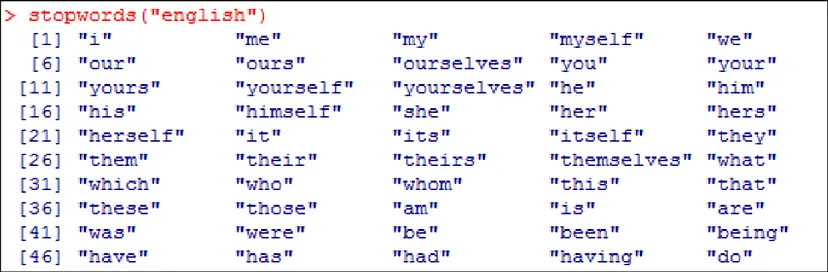

In [55]:
tfidf = TfidfVectorizer(stop_words='english')

# Construct the required TF-IDF matrix by fitting and transforming the data

In [56]:
tfidf_mat =  tfidf.fit_transform(df['tagline'])
tfidf_df = pd.DataFrame(tfidf_mat.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.head()

,1000,142,15,1925,1927,1931,1938,1940,1944,1945,...,worlds,worse,writer,written,wrongly,year,years,young,youth,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Cosine similarity

- We're making use of Cosine similarity. Cosine similarity is a measure of similarity between two non-zero vectors defined in an inner product space in data analysis. Cosine similarity is defined as the cosine of the angle between the vectors, or the dot product of the vectors divided by the product of their lengths.

In [57]:
from sklearn.metrics.pairwise import linear_kernel

## Compute cosine similarity matrix

In [58]:
cosine_similarity = linear_kernel(tfidf_mat, tfidf_mat)

# create index for each movie name

In [59]:
index = pd.Series(df.index, index=df['name']).drop_duplicates()
index.head(10)

name
The Shawshank Redemption                             0
The Godfather                                        1
The Dark Knight                                      2
The Godfather Part II                                3
12 Angry Men                                         4
Schindler's List                                     5
The Lord of the Rings: The Return of the King        6
Pulp Fiction                                         7
The Lord of the Rings: The Fellowship of the Ring    8
The Good, the Bad and the Ugly                       9
dtype: int64

# recommendations system using tagline (just one column)

In [60]:
def recommendation(movie_name, cosine_similarity=cosine_similarity):
    
    movie_index = index[movie_name]
    # Get the pairwsie similarity scores of all movies with that movie
    similarity_score = list(enumerate(cosine_similarity[movie_index]))
    
    # Sort the movies based on the similarity scores
    similarity_score = sorted(similarity_score,key=lambda x: x[1],reverse=True)
    
    # Get the scores of the 10 most similar movies
    similarity_score = similarity_score[1:11]
    
    movie_indices = [i[0] for i in similarity_score]
    
    # Return the top 10 most similar movies
    return df['name'].iloc[movie_indices]


In [61]:
movie_r = input("Enter your recent watched movie: ")
recommendation(movie_r)
# Avengers: Infinity War -->> problem here
# City of God

Enter your recent watched movie: Avengers: Infinity War


65                    Spider-Man: Into the Spider-Verse
5                                      Schindler's List
0                              The Shawshank Redemption
1                                         The Godfather
2                                       The Dark Knight
3                                 The Godfather Part II
4                                          12 Angry Men
6         The Lord of the Rings: The Return of the King
7                                          Pulp Fiction
8     The Lord of the Rings: The Fellowship of the Ring
Name: name, dtype: object

# Count Vectorizer

### here we've used only one column to predict/ recomend which is not very accurate or preferable to use
### let's use more column for recommendations.

## using below attributes:
1) Name

2) Cast

3) Director

4) Genre

5) Tagline

In [40]:
df_new = df.fillna('')

In [41]:
# using that mentioned 5 features for recommendation

features = ['name','cast','directors','genre','tagline']
def combined(five):
    return five['name'] + five['casts'] + five['directors'] + five['genre'] + five['tagline']    

In [62]:
df_new['combine_features'] = df_new.apply(combined,axis=1)
print(df_new['combine_features'][0])
df_new.head()

The Shawshank RedemptionTim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,Gil Bellows,Mark Rolston,James Whitmore,Jeffrey DeMunn,Larry Brandenburg,Neil Giuntoli,Brian Libby,David Proval,Joseph Ragno,Jude Ciccolella,Paul McCrane,Renee Blaine,Scott MannFrank DarabontDramaFear can hold you prisoner. Hope can set you free.


,index,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genre_1,genre_2,genre_3,combine_features
0,0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,2.888450e+07,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,,,"The Shawshank RedemptionTim Robbins,Morgan Fre..."
1,1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,2.503418e+08,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,,"The GodfatherMarlon Brando,Al Pacino,James Caa..."
2,2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1.006234e+09,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama,"The Dark KnightChristian Bale,Heath Ledger,Aar..."
3,3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,4.796192e+07,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,,"The Godfather Part IIAl Pacino,Robert De Niro,..."
4,4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,9.550000e+02,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,,"12 Angry MenHenry Fonda,Lee J. Cobb,Martin Bal..."


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# CREATING COUNTVECTORIZER AND COSINE SIMILARITY MATRIX

In [64]:
cnt = CountVectorizer(stop_words='english')
cnt_matrix = cnt.fit_transform(df_new['combine_features'])

cosine_similarity_cnt = cosine_similarity(cnt_matrix,cnt_matrix)

# CREATE INDEX FOR MOVIE NAME

In [65]:
df_new = df_new.reset_index()
index = pd.Series(df_new.index, index=df_new['name'])
index.head(10)

name
The Shawshank Redemption                             0
The Godfather                                        1
The Dark Knight                                      2
The Godfather Part II                                3
12 Angry Men                                         4
Schindler's List                                     5
The Lord of the Rings: The Return of the King        6
Pulp Fiction                                         7
The Lord of the Rings: The Fellowship of the Ring    8
The Good, the Bad and the Ugly                       9
dtype: int64

# RECOMMENDATION SYSTEM

In [66]:
def recommendations(movie_name, cosine_similarity=cosine_similarity):
    
    movie_index = index[movie_name]
    # Get the pairwsie similarity scores of all movies with that movie
    similarity_score = list(enumerate(cosine_similarity[movie_index]))
    
    # Sort the movies based on the similarity scores
    similarity_score = sorted(similarity_score,key=lambda x: x[1],reverse=True)
    
    # Get the scores of the 10 most similar movies
    similarity_score = similarity_score[1:11]
    
    movie_indices = [i[0] for i in similarity_score]
    print("Your recommendations are:\n ")
    # Return the top 10 most similar movies
    return df['name'].iloc[movie_indices]

# GUI

In [67]:
import tkinter as tk 

def display_GUI():
    # get the user input from the entry box
    movie_name = entry.get()
    
    # get the movie recommendations
    recommendations_list = recommendations(movie_name,cosine_similarity_cnt) 
    
    # clear any previous recommendations on the GUI
    for widget in frame.winfo_children():
        widget.destroy()
    
    
    # display the movie recommendations on the GUI
    for i, name in enumerate(recommendations_list):
        label = tk.Label(frame, text=f"{i+1}. {name}",bg='#F5F5DC')
        label.pack()
        
# create the GUI
root = tk.Tk()


root.title("Movie Recommendation System")


root.geometry('600x500')
root.configure(bg='#3EB489')

# create the entry box and button
entry = tk.Entry(root, width=50)
entry.pack(pady=10)

button = tk.Button(root, text="Get Recommendations", command=display_GUI)
button.pack()
# create the frame to display movie recommendations
frame = tk.Frame(root,bg='#F5F5DC')
frame.pack(pady=50)


# run the GUI
root.mainloop()

Your recommendations are:
 
